# Playstore App Rating Prediction

###### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly 
#import plotly.offline as pyo
#from plotly.offline import iplot,plot,init_notebook_mode
#import plotly.express as px
#import cufflinks as cf
#import plotly.graph_objects as go
import seaborn as sns
plt.rc('figure', figsize=(20.0, 10.0))

In [2]:
###!pip install plotly

###### Load the datafile

In [3]:
dataset=pd.read_csv("googleplaystore.csv")

In [4]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###### Check for null values in the data. Get the number of null values for each column.

In [5]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###### Drop records with nulls in any of the columns.

In [6]:
#Dropping the rows which have any null records
dataset=dataset.dropna()
dataset=dataset.reset_index(drop=True)

In [7]:
#Checking for any null records
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###### Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

In [8]:
#Analysing various data types of different rows in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 950.8+ KB


###### Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [9]:
#Converting the Reviews column into integers
dataset['Reviews']=dataset["Reviews"].astype(int)

###### Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [10]:
#Converting the size variable into a single type by removing 'M', 'k' and the string "varies with device" present in it
dataset["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [11]:
#This function will check whether the value have 'M' or 'k' and according to it will change the value.

def mb_to_kb(a):
  if a.endswith("M"):
    return float(a[:-1])*1000
  elif a.endswith("k"):
    return float(a[:-1])
  else:
    return a

In [12]:
dataset["Size"]=dataset["Size"].apply(lambda x:mb_to_kb(x))

In [13]:
dataset[dataset["Size"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
35,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
40,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
50,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
65,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
66,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
9279,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
9307,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
9348,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [14]:
rows=dataset[dataset["Size"]=="Varies with device"].index
dataset.drop(rows,inplace=True)

###### Installs field is currently stored as string and has values like 1,000,000+. 

-Treat 1,000,000+ as 1,000,000

-remove ‘+’, ‘,’ from the field, convert it to integer

In [15]:
#Removing the '+' symbol from each value in Installs column
dataset["Installs"].value_counts()

1,000,000+        1301
100,000+          1037
10,000+            968
10,000,000+        825
1,000+             689
5,000,000+         535
500,000+           490
50,000+            436
5,000+             419
100+               303
100,000,000+       201
500+               197
50,000,000+        147
10+                 67
50+                 56
500,000,000+        30
1,000,000,000+      10
5+                   9
1+                   3
Name: Installs, dtype: int64

In [16]:
dataset["Installs"]=dataset["Installs"].str[:-1]
dataset["Installs"]=dataset["Installs"].apply(lambda x:x.replace(",",""))

In [17]:
dataset["Installs"]=dataset["Installs"].astype(int)

###### Price field is a string and has a  dollar symbol. Remove dollar  sign, and convert it to numeric.

In [18]:
#Removing the '$' sign from the Price Column
dataset["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [19]:
dataset["Price"]=dataset["Price"].apply(lambda x:x.replace("$",""))
dataset["Price"]=dataset["Price"].astype(float)

In [20]:
#Removing the rows with more nummber of rating than installs
dataset["Rating"].between(0,5).sum()

7723

###### Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [21]:
rows=dataset[dataset["Installs"]<dataset["Reviews"]].index
dataset.drop(rows,inplace=True)

### Univariate Analysis

In [22]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<AxesSubplot: >

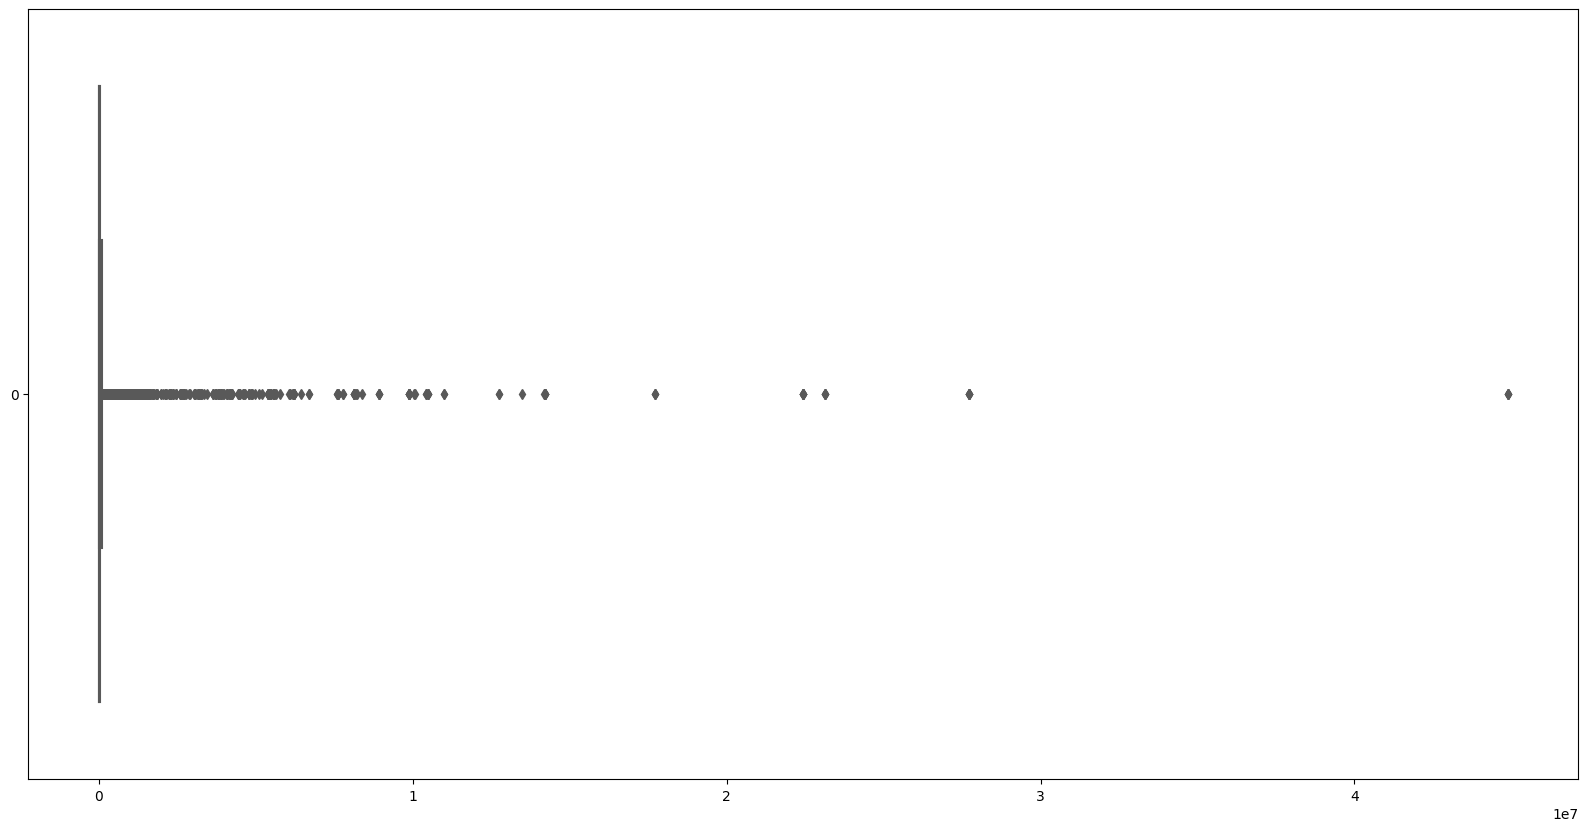

In [23]:
#Outlier Correction
sns.boxplot(data=dataset['Reviews'],orient="h",palette="Set2")

In [24]:
dataset["Reviews"].value_counts()

2          80
3          77
5          74
4          71
1          66
           ..
192661      1
54207       1
1335799     1
148506      1
398307      1
Name: Reviews, Length: 4669, dtype: int64

###### Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [25]:
rows=dataset[dataset["Reviews"]>2000000].index

In [26]:
dataset.drop(rows,inplace=True)

###### Check out the records with very high price

--Is 200 indeed a high price?
--Drop these as most seem to be junk apps

<AxesSubplot: >

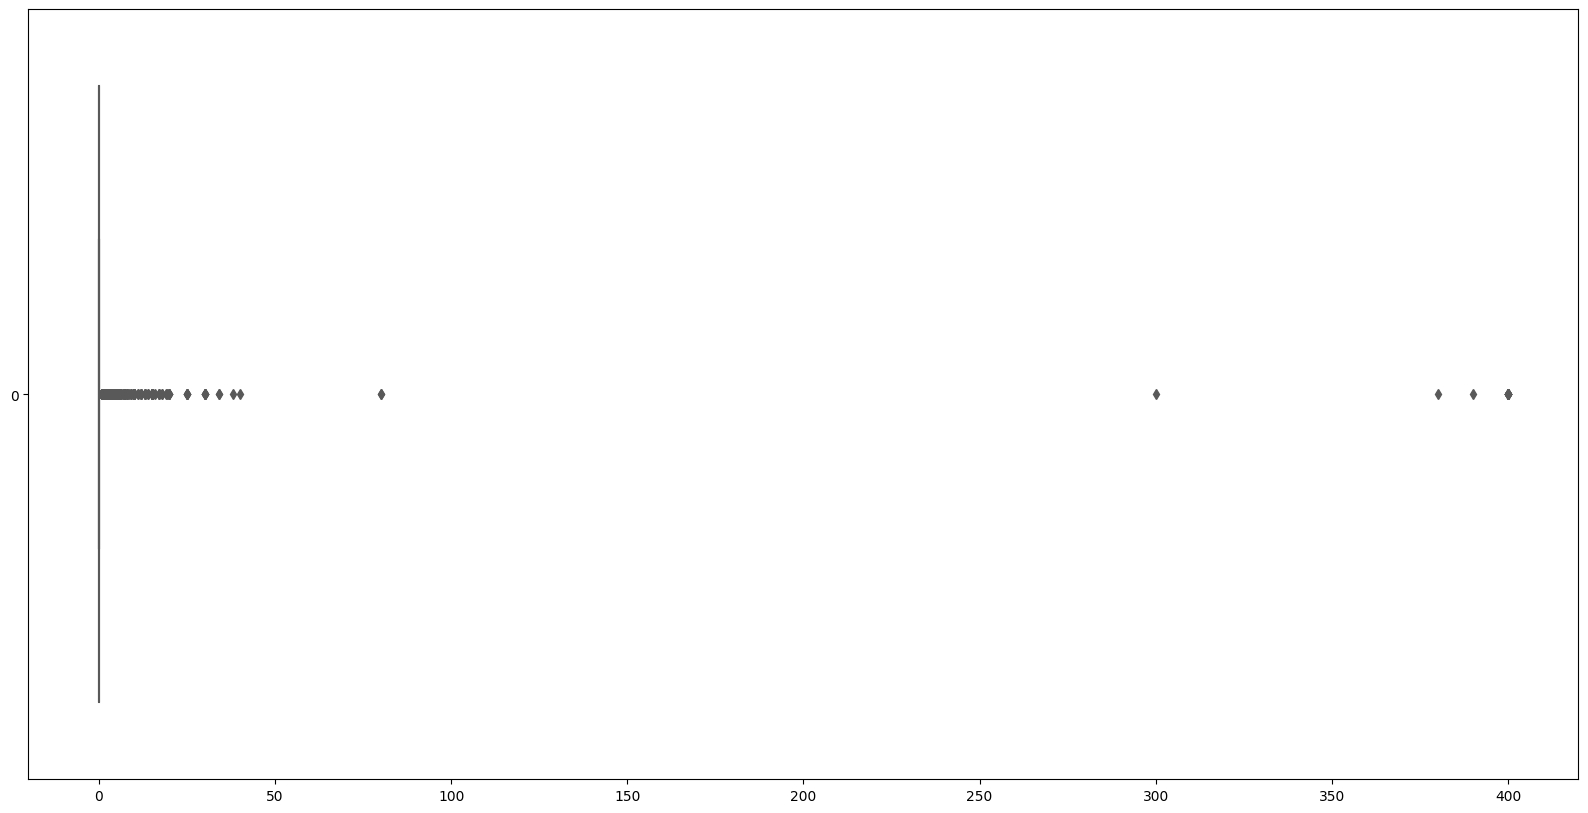

In [27]:
#Outlier Correction
sns.boxplot(data=dataset['Price'],orient="h",palette="Set2")

###### From the box plot, it seems like there are some apps with very high price. A price of 200 for an application on the Play Store is very high and suspicious!. Hence removing the applications with price more than 200$

In [28]:
rows=dataset[dataset["Price"]>200].index

In [29]:
dataset.drop(rows,inplace=True)

In [30]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<AxesSubplot: >

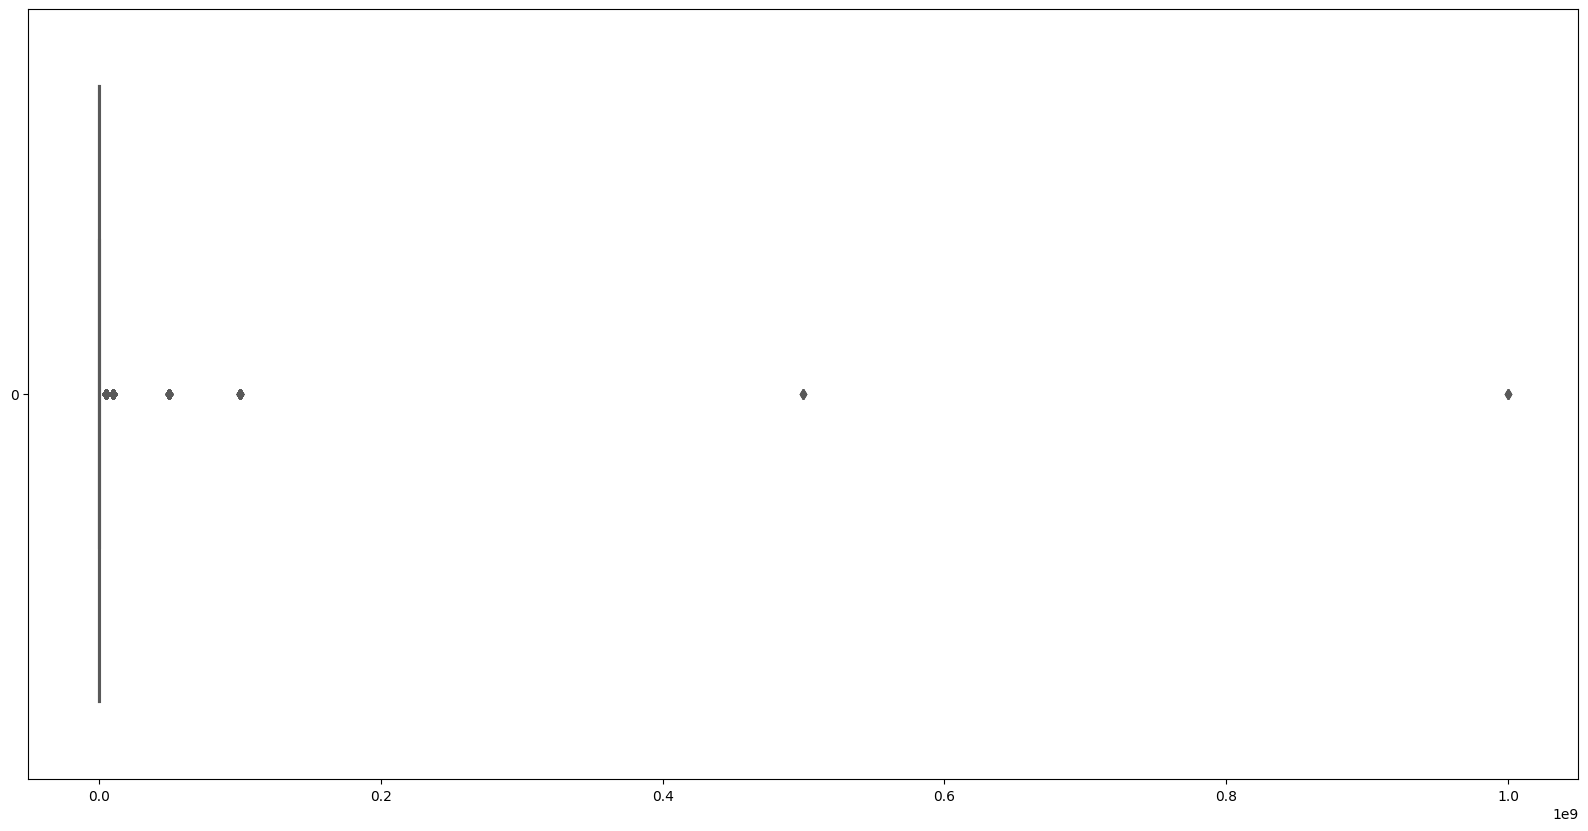

In [31]:
#Outlier Correction
sns.boxplot(data=dataset['Installs'],orient="h",palette="Set2")

###### Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

-Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

-Decide a threshold as cutoff for outlier and drop records having values more than that
-There seems to be some outliers in installs field too. Hence setting the threshold at 500000

In [32]:
perc=[.10, .25, .50, .70, .90, .95, .99]
dataset["Installs"].describe(percentiles=perc)

count    7.483000e+03
mean     3.947465e+06
std      2.781831e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      1.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      5.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

C:\Users\win10\AppData\Local\Temp\ipykernel_348\2716639737.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Installs"],kde=False)


<AxesSubplot: xlabel='Installs'>

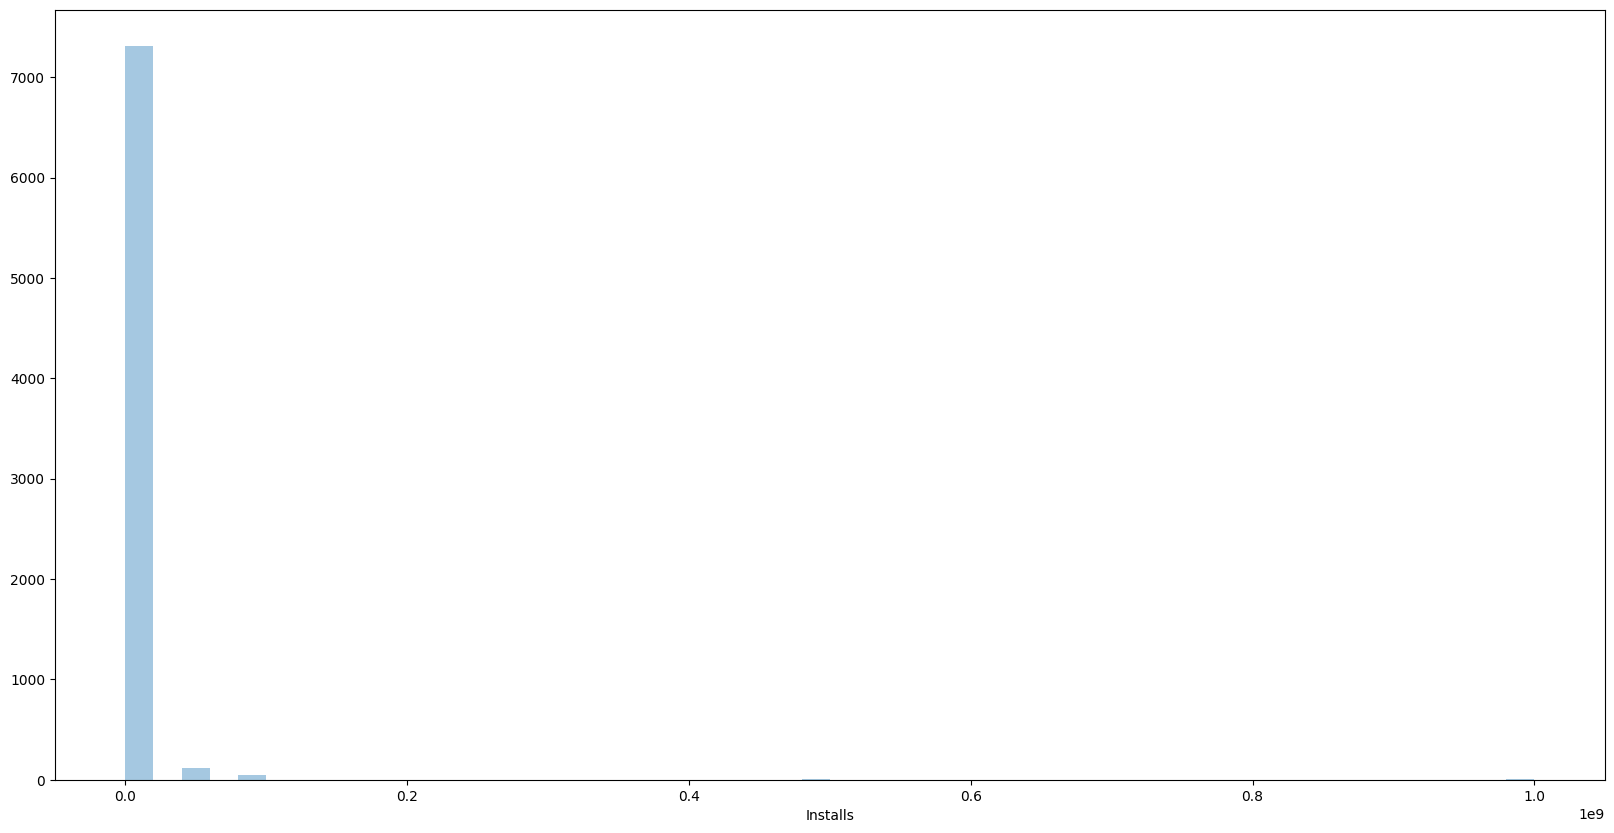

In [33]:
sns.distplot(dataset["Installs"],kde=False)

In [34]:
rows=dataset[dataset["Price"]>500000].index

In [35]:
dataset.drop(rows,inplace=True)

###### Histogram for Rating

C:\Users\win10\AppData\Local\Temp\ipykernel_348\3403769111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Rating"],kde=False)


<AxesSubplot: xlabel='Rating'>

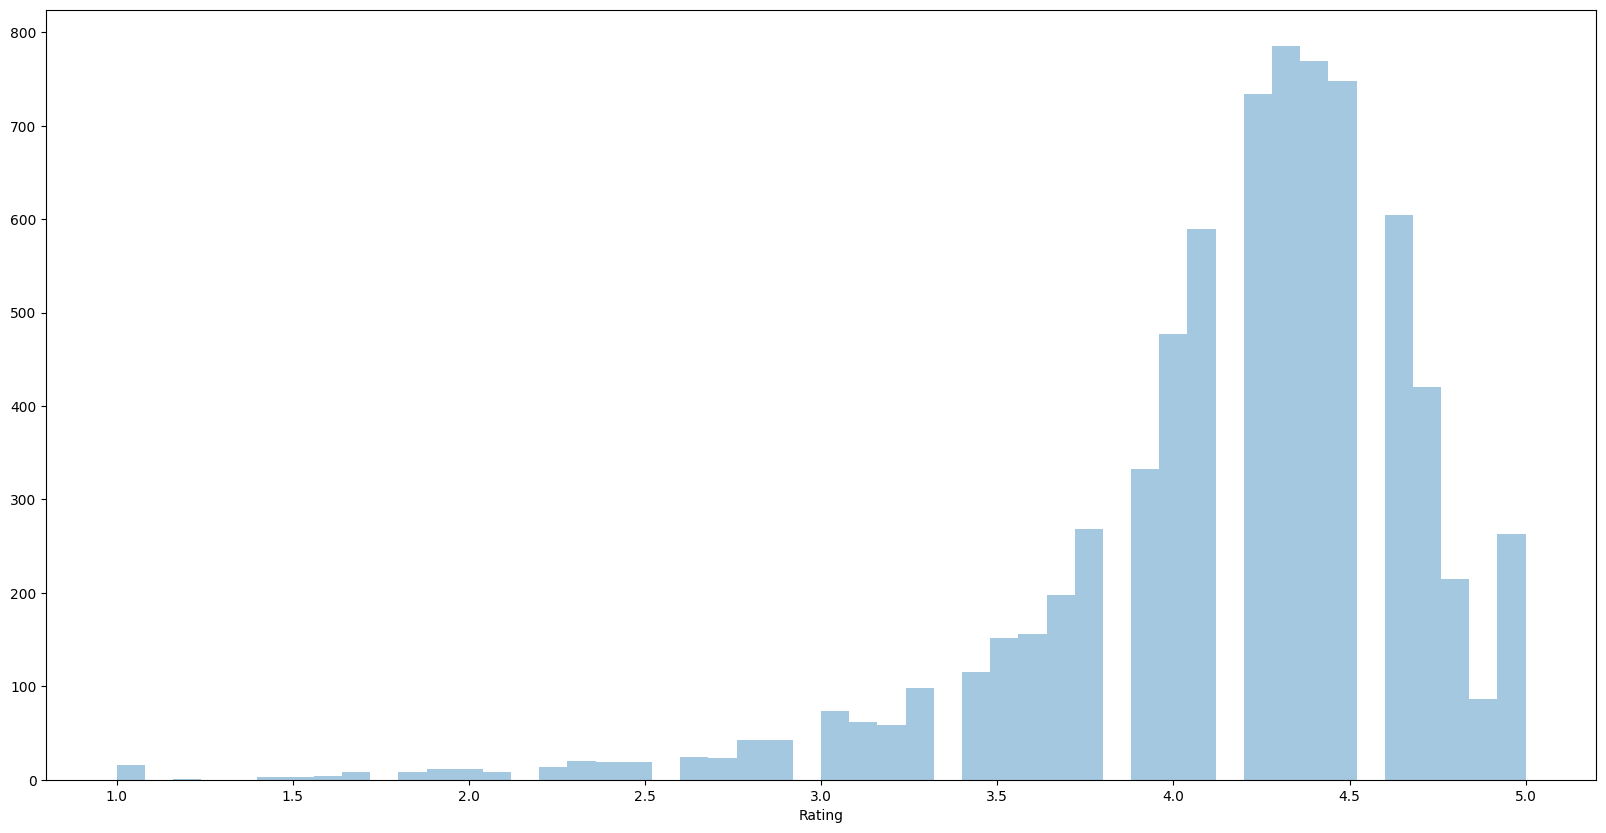

In [36]:
sns.distplot(dataset["Rating"],kde=False)

###### Histogram for Size

C:\Users\win10\AppData\Local\Temp\ipykernel_348\2777044980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Size"],kde=False)


<AxesSubplot: xlabel='Size'>

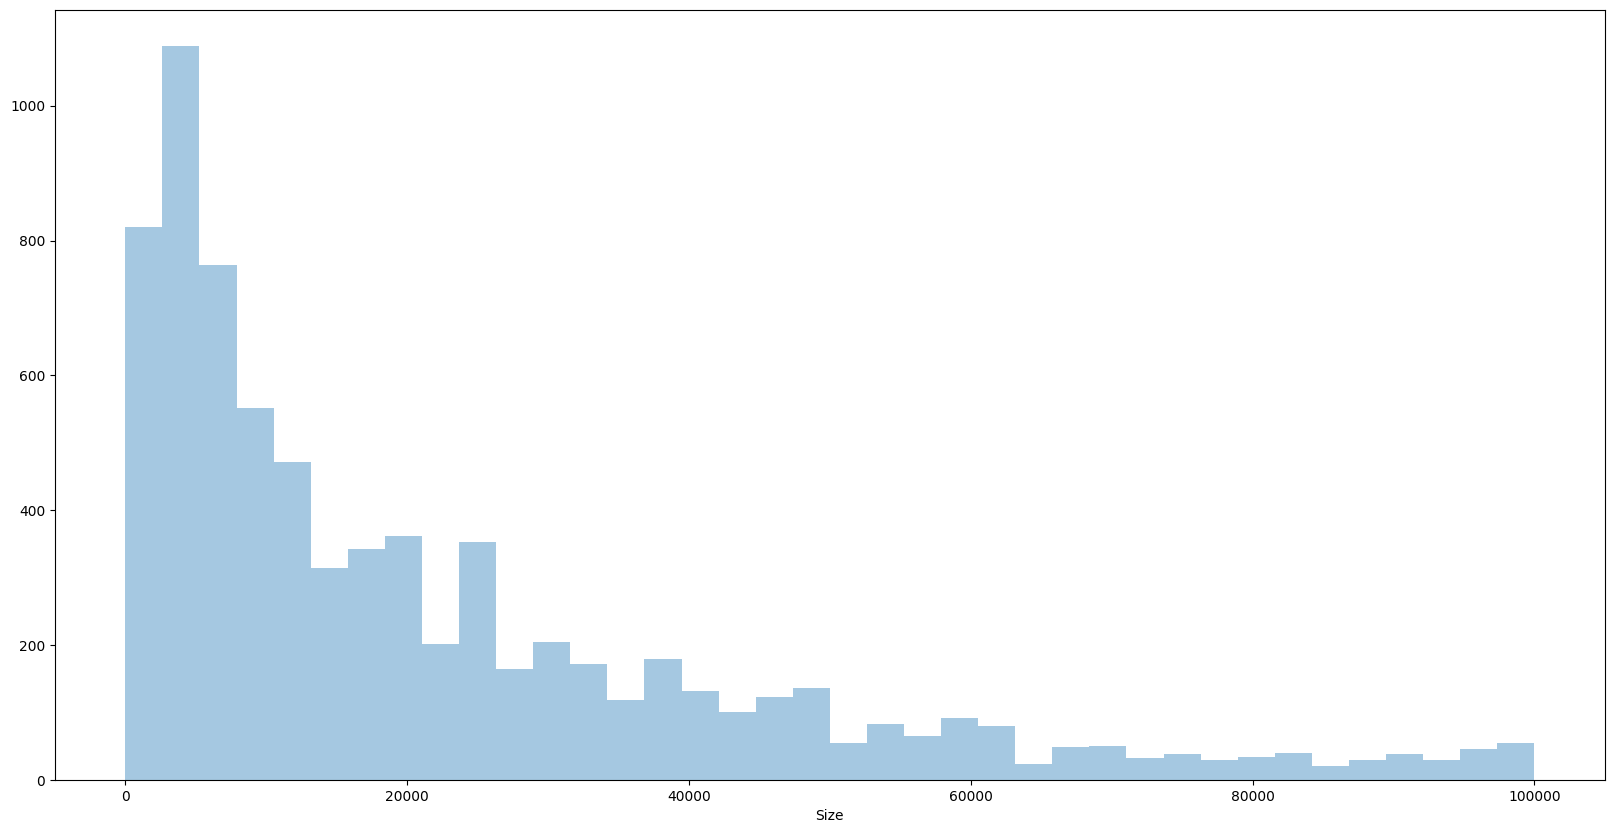

In [37]:
sns.distplot(dataset["Size"],kde=False)

Multivariate Analysis

In [38]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
9355,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


###### Make scatter plot/joinplot for Rating vs. Price --What pattern do you observe? Does rating increase with price?

<AxesSubplot: xlabel='Rating', ylabel='Price'>

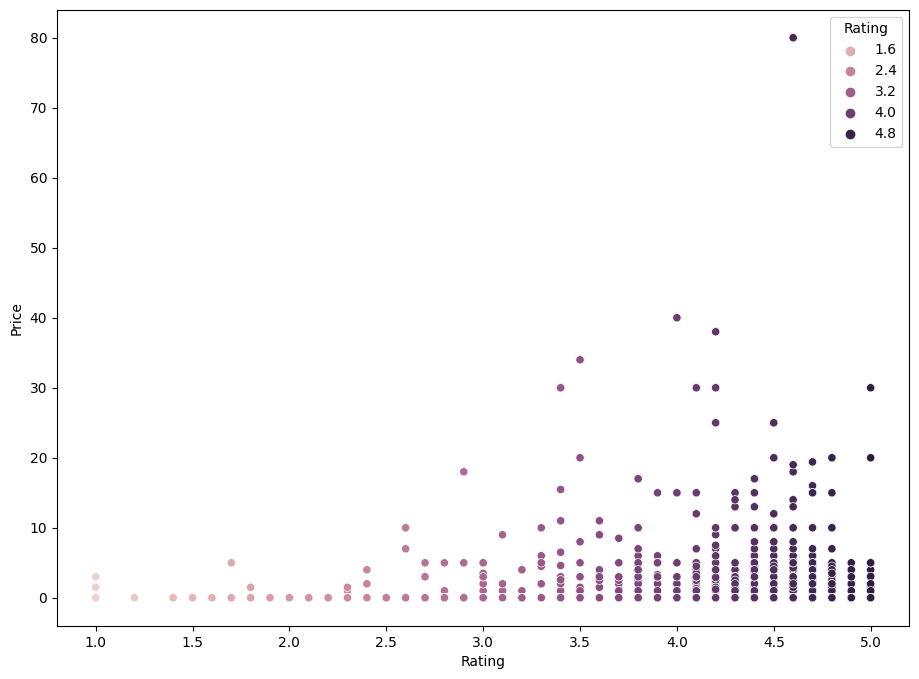

In [39]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=dataset["Rating"],y=dataset["Price"],hue=dataset["Rating"])

###### Make scatter plot/joinplot for Rating vs. Size ---Are heavier apps rated better?

<AxesSubplot: xlabel='Rating', ylabel='Size'>

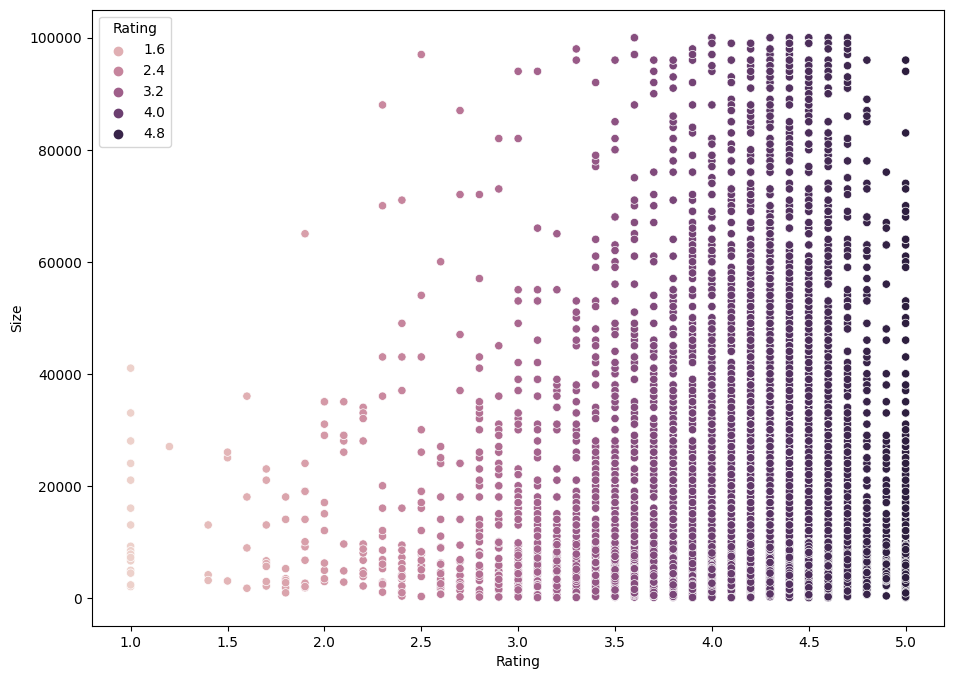

In [40]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=dataset["Rating"],y=dataset["Size"],hue=dataset["Rating"])

###### Make scatter plot/joinplot for Rating vs. Reviews --Does more review mean a better rating always?

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

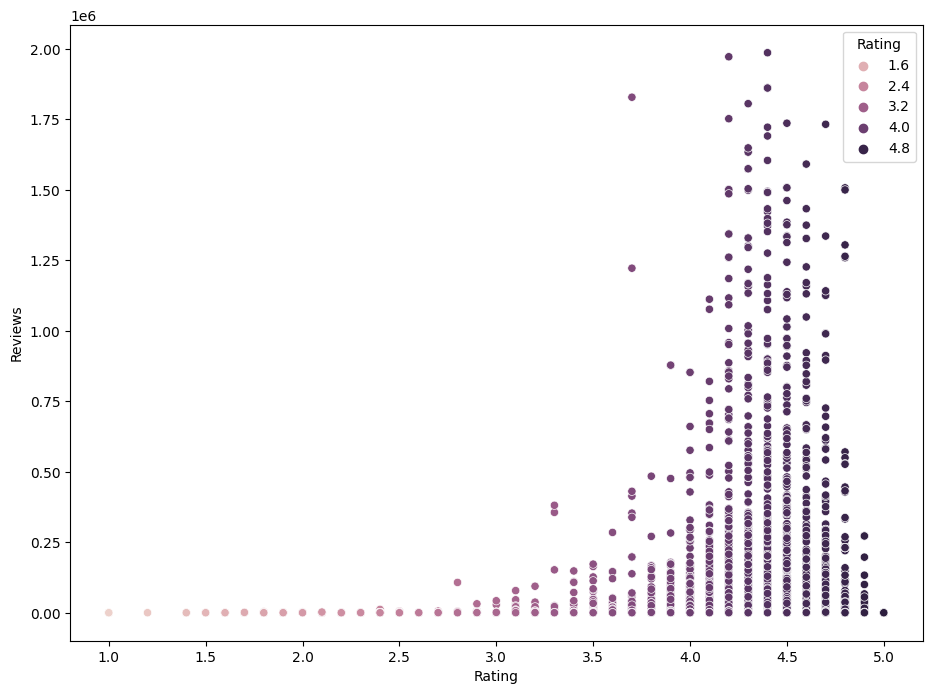

In [41]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=dataset["Rating"],y=dataset["Reviews"],hue=dataset["Rating"])

###### Make boxplot for Rating vs. Content Rating ---Is there any difference in the ratings? Are some types liked better?

<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

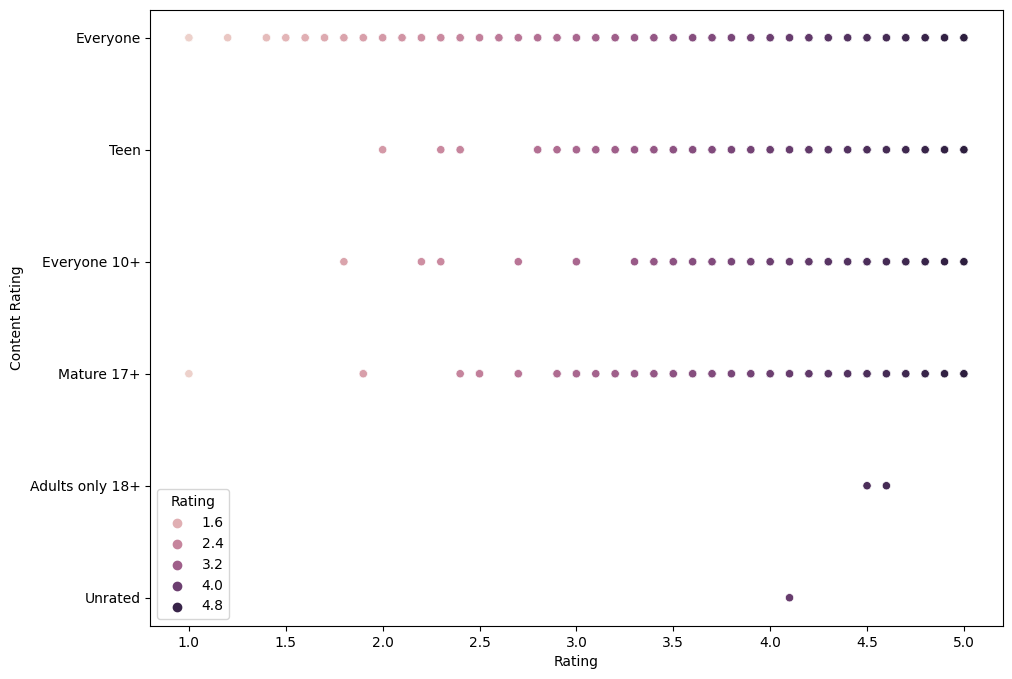

In [42]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=dataset["Rating"],y=dataset["Content Rating"],hue=dataset["Rating"])

###### Make boxplot for Ratings vs. Category --Which genre has the best ratings?

<AxesSubplot: xlabel='Rating', ylabel='Category'>

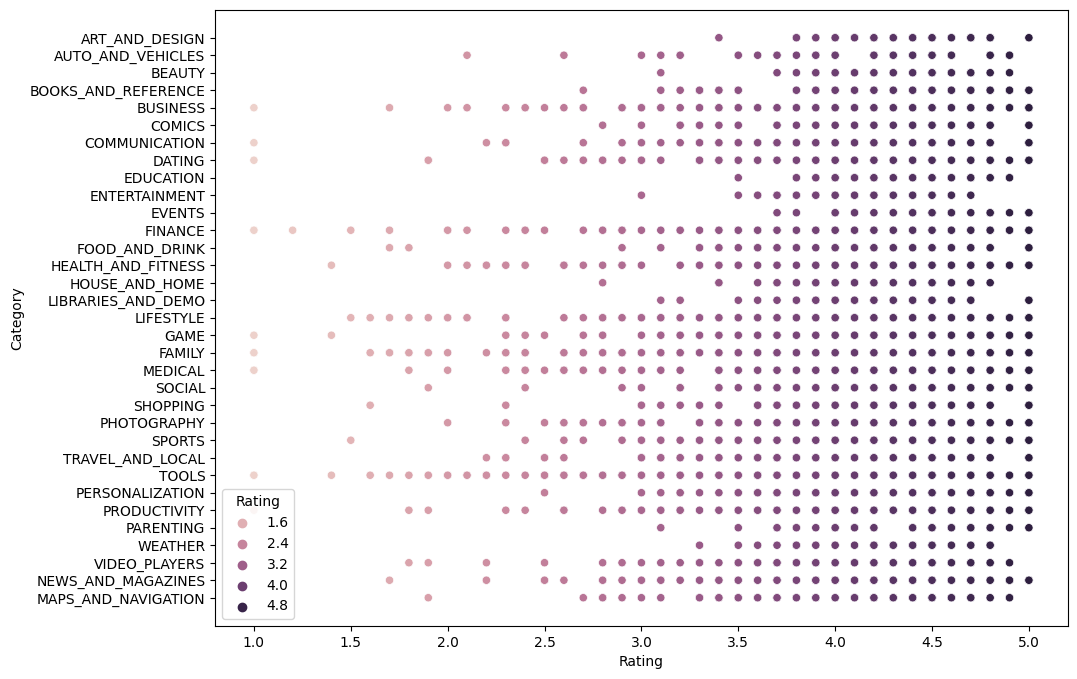

In [43]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=dataset["Rating"],y=dataset["Category"],hue=dataset["Rating"])

### Data Preprocessing

###### Create a copy of the dataframe to make all the edits. Name it inp1.

In [44]:
inp1 = dataset.copy()
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [45]:
#Reseting the rows' index
inp1=inp1.reset_index(drop=True)

###### Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [46]:
#Droping all teh unnecessary columns from the dataset
col_useful=['Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Price','Content Rating', 'Genres']
df_useful =inp1[col_useful]

In [47]:
df_useful.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity


###### Apply log transformation (np.log1p) to Reviews and Installs.

In [48]:
df_useful['log_Installs'] = df_useful['Installs'].apply(np.log1p)

C:\Users\win10\AppData\Local\Temp\ipykernel_348\302540963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['log_Installs'] = df_useful['Installs'].apply(np.log1p)


In [49]:
df_useful['log_Installs']

0        9.210440
1       13.122365
2       15.424949
3       17.727534
4       11.512935
          ...    
7478     6.908755
7479     6.216606
7480     8.517393
7481     4.615121
7482    16.118096
Name: log_Installs, Length: 7483, dtype: float64

In [50]:
df_useful['log_Reviews'] = np.log1p(df_useful['Reviews'])

C:\Users\win10\AppData\Local\Temp\ipykernel_348\414248437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['log_Reviews'] = np.log1p(df_useful['Reviews'])


In [51]:
df_useful['log_Reviews'] 

0        5.075174
1        6.875232
2       11.379520
3       12.281389
4        6.875232
          ...    
7478     3.806662
7479     2.079442
7480     3.663562
7481     1.609438
7482    12.894981
Name: log_Reviews, Length: 7483, dtype: float64

###### Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [52]:
#Converting categorical columns to numeric columns
dummy = ['Category', 'Genres','Content Rating']
inp2 = pd.get_dummies(df_useful,columns=dummy,drop_first=True)
inp2.head()

,Rating,Reviews,Size,Installs,Price,log_Installs,log_Reviews,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000.0,10000,0.0,9.210440,5.075174,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000.0,500000,0.0,13.122365,6.875232,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700.0,5000000,0.0,15.424949,11.379520,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,25000.0,50000000,0.0,17.727534,12.281389,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800.0,100000,0.0,11.512935,6.875232,0,0,0,...,0,0,0,0,0,1,0,0,0,0


###### Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.Separate the dataframes into X_train, y_train, X_test, and y_test.

In [53]:
df_train=inp2.iloc[:,1:]
df_test=inp2.iloc[:,0]

In [54]:
df_train.shape

(7483, 154)

In [55]:
#Spliting the dataset into training and testing dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,df_test,test_size=0.3)

###### Model building

In [56]:
#Model Training
#Using the LinearRegression model from sklearn library

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(X_train, y_train)

In [57]:
#Predicting the Test result

y_pred=model.predict(X_test)

In [58]:
#Finding various metrics for evaluating the regression model from sklearn library

from sklearn.metrics import r2_score,mean_squared_error
print('R2_Score=',r2_score(y_test,y_pred))
print('Root_Mean_Squared_Error(RMSE)=',np.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score= 0.14993079432280731
Root_Mean_Squared_Error(RMSE)= 0.5015386094985903


In [59]:
a=pd.DataFrame({'Actual':y_test,'Predicted':y_pred});a.head(10)

,Actual,Predicted
128,4.6,4.116162
2891,4.0,4.262276
31,4.2,4.412655
2345,4.1,4.398586
6099,4.6,3.852304
2728,3.8,3.941008
1944,4.3,4.262731
3636,4.7,4.552863
6836,3.5,4.309693
6125,4.2,4.127724
